In [2]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 24.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [3]:
import easyocr as ocr
from PIL import Image
import numpy as np
import requests
from io import BytesIO

### Load model

In [4]:
# load in ocr model
def load_model():
    reader = ocr.Reader(['en'], model_storage_directory='.')
    return reader

reader = load_model()

### Function to format text result

In [5]:
def extract_text(input_image):
    result = reader.readtext(np.array(input_image))

    # format text
    result_text = []

    for text in result:
        result_text.append(text[1])
    
    img_text = ' '.join(map(str,result_text))
    
    return img_text

### Load image from URL

In [6]:
# request URL response
url = "https://www.forbesindia.com/media/images/2023/May/img_207565_mayaangelou.jpg"
response = requests.get(url)

# open image content
img = Image.open(BytesIO(response.content))

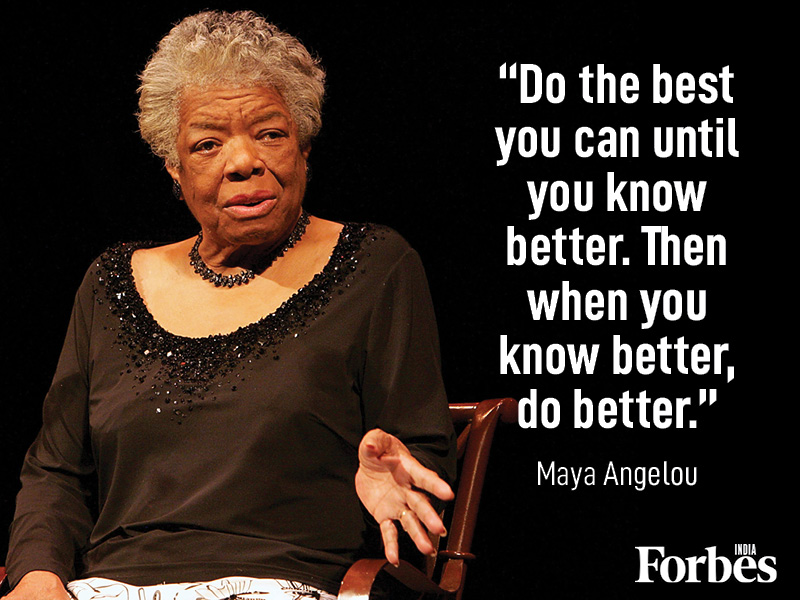

In [7]:
# display image
img

In [8]:
extract_text(img)

'Do the best you can until you know better; Then when you know better; do better;" Maya Angelou Forbes'

### Load image from file

In [9]:
# img file path
img_file = "assets/quote.jpeg"

# load image
img = Image.open(img_file)

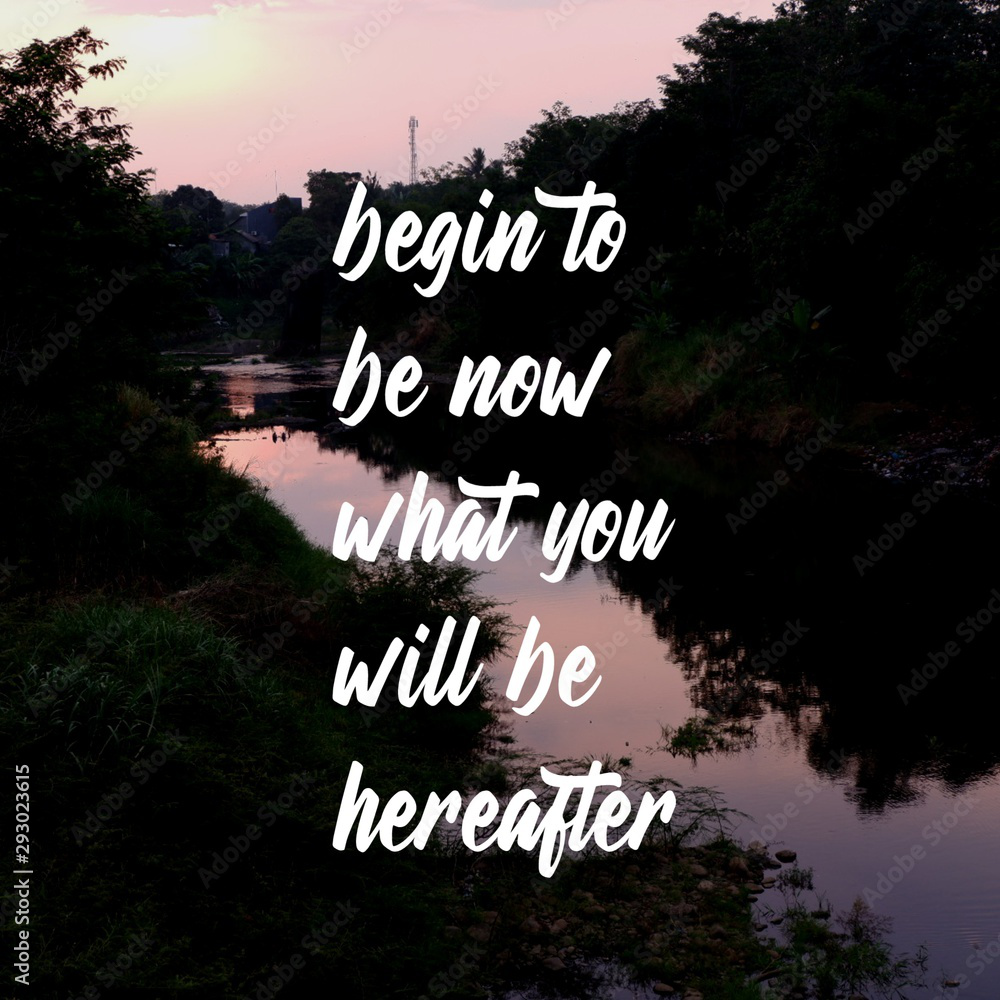

In [10]:
# display image
img

In [11]:
extract_text(img)

'   begin To he 50 What you S Will he 1 hereafter 1 {  8  stock  stock Adobe Adobe stock 8 Stock Stogk dobe now Adobe 8 Nobe: Stock Sto Adobe 8 8 1 Adobe Aoce 3 obe stock Adobe stock Adobe Sto obe St Stoch 8 Adobe Stock 38 toc dobe'

In [15]:
results = reader.readtext(np.array(img))

### filter results with margin

In [16]:
# get image dimensions
image_width, image_height = img.size

In [17]:
percentage = 0.80  # Percentage of the center region (e.g., 75%)

# Calculate the margin based on the image size and percentage
margin_x = int(image_width * (1 - percentage) / 2)
margin_y = int(image_height * (1 - percentage) / 2)

filtered_results = []
for result in results:
    bbox = result[0]
    bbox_width = bbox[2][0] - bbox[0][0]
    bbox_height = bbox[2][1] - bbox[0][1]
    center_x = (bbox[0][0] + bbox[2][0]) / 2
    center_y = (bbox[0][1] + bbox[2][1]) / 2
    
    if (
        center_x > margin_x and center_x < (image_width - margin_x) and
        center_y > margin_y and center_y < (image_height - margin_y) and
        bbox_width > margin_x and bbox_height > margin_y
    ):
        filtered_results.append(result)


In [18]:
result_text = []
for text in filtered_results:
    result_text.append(text[1])

In [19]:
result_text

['begin To', 'he', 'What you', 'Will he', 'hereafter']

margin = 350  # Margin in pixels

filtered_results = []
for result in results:
    # Extract the coordinates of the bounding box
    bbox = result[0]
    
    # Check if the bounding box is within the margin
    if bbox[0][0] > margin and bbox[0][1] > margin and bbox[2][0] < (image_width - margin) and bbox[2][1] < (image_height - margin):
        filtered_results.append(result)
